# Tarefa 4 - Francisco José Santos de Oliveira - 119150156

## Importações

In [1]:
using Random
using Plots
using Polynomials
using LinearAlgebra


(process:1720): GLib-GIO-WARNING **: 16:51:10.110: Unexpectedly, UWP app `60132torumyax.SimpleImageViewer_1.2.17.0_x86__s0dtgdfwgsbky' (AUMId `60132torumyax.SimpleImageViewer_s0dtgdfwgsbky!ImageViewer') supports 5 extensions but has no verbs


## Questão 1.1

### Item 1.1.2

Implementamos o Método de Newton com quantidade de passos:

In [2]:
function Newton(f, fd, x, limite_passos)
    #entradas: função, primeira derivada, x e o limite de passos
    
    #criamos um limite de passos para que o algoritmo não fique rodando infinitamente
    passos = 0
    tolerância = 1e-14
    
    #loop para aproximação do x
    while(abs(f(x))>tolerância) && passos < limite_passos
        
        #
        x = x - f(x) / fd(x)
        passos += 1
    end
    
    #tratamento de erro para caso o limite de passos tenha sido excedido
    if(passos > limite_passos)
        error("número de passos excedido sem convergência bem sucedida.")
    end
    
    #retorno do valor aproximado de x
    x
end

Newton (generic function with 1 method)

Agora, implementamos os parâmetros para poder chamar a função Newton. Como sabemos que x = 1 já chega relativamente perto de 3, tentarei partir desse ponto para me aproximar da resposta final. 

In [3]:
f(x) = (ℯ^x) - 3
fd(x) = ℯ^x
x = 1.0
Newton(f,fd,x,20)

1.0986122886681096

### Item 1.1.4

Implementamos o algoritmo de interpolação polinomial e o de conversão para valores:

In [4]:
function interpolação(x, y)
   
    #criar a matriz de Vondermonde
    V=[x.^0 x.^1 x.^2]
    #resolver o sistema linear Vc=y
    c=V\y
    
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [5]:
function avaliar_um_polinomio(c,x)
    V=[x.^0 x.^1 x.^2]
    y=V*c
    return y
end

avaliar_um_polinomio (generic function with 1 method)

In [6]:
x = [1; 2.718281828459045;]
y = [0; 1;]

2-element Vector{Int64}:
 0
 1

In [7]:
j=interpolação(x,y)

3-element Vector{Float64}:
 -0.12360883132207473
 -0.04501528658519045
  0.16862411790726461

In [8]:
x=[1; 2.718281828459045; 3]
y = avaliar_um_polinomio(j,x)

3-element Vector{Float64}:
 -5.551115123125783e-16
  1.0000000000000004
  1.2589623700877355

Agora, precisamos estimar o erro máximo. Começamos calculando a segunda derivada (porque n+1 = 2) da função interpolada.

$$(ln(x))'' = |-\frac{1}{x^2}|$$

Agora, temos a seguinte fórmula para o teto do erro:

$$\frac{f^{(n+1)}(\epsilon)*|x-x0|*|x-x1|}{(n+1)!}$$

Onde x é o 3 do ln 3, x0 e x1 os pontos utilizados (1 e 2.718281828459045) e n o grau, agora fazemos as substituições. Iremos substituir o x pelo ponto onde o valor será maior, já que queremos o teto. Nesse caso, o x será 1.

$$\frac{|-\frac{1}{1^2}|*|3-1|*|3-e|}{(2)!}$$

$$\frac{1*|2|*|0.2817181715409549|}{2}$$

$$Erro Max = 0.2817181715409549$$

### Item 1.1.5

In [9]:
x = [1; 2.718281828459045; 7.38905609893065]
y = [0; 1; 2]
c=interpolação(x,y)
x = [1; 2.718281828459045; 7.38905609893065; 3]
y = avaliar_um_polinomio(c,x)

4-element Vector{Float64}:
 4.163336342344337e-17
 1.0
 2.0000000000000004
 1.1315109615486734

Agora, precisamos estimar o erro máximo. Começamos calculando a terceira derivada (porque n+1 = 3) da função interpolada.

$$(ln(x))''' = |\frac{2}{x^3}|$$

Agora, temos a seguinte fórmula para o teto do erro:

$$\frac{f^{(n+1)}(\epsilon)*|x-x0|*|x-x1|*|x-x2|}{(n+1)!}$$

Onde x é o 3 do ln 3, x0, x1 e x2 os pontos utilizados (1, 2.718281828459045 e 7.38905609893065) e n o grau, agora fazemos as substituições. Iremos substituir o x pelo ponto onde o valor será maior, já que queremos o teto. Nesse caso, o x será 1.

$$\frac{|\frac{2}{1^3}|*|3-1|*|3-e|*|3-e^2|}{(3)!}$$

$$\frac{2*2*0.2817181715409549*4.38905609893065}{6}$$

$$Erro Max = 0.8243179058677773$$

## Questão 1.2

### Item 1.2.1 

Vamos gerar 30 pontos aleatórios com ruído, de uma função de quinto grau.

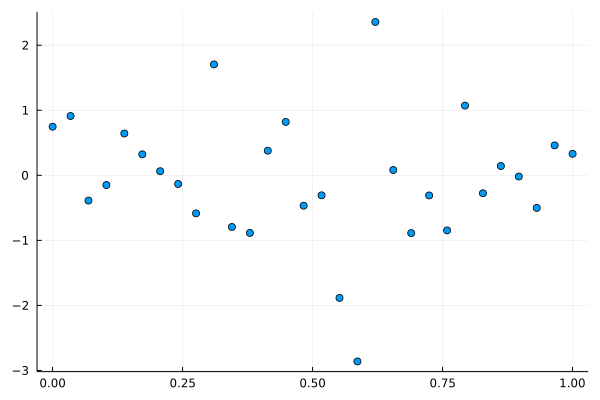

In [10]:
Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 1, length=n)
e1(x) = x^5
e2(x) = -x^3

y = e1.(x) + e2.(x) + randn(n)*1.1

scatter(x,y,leg=false)

### Item 1.2.2 Regressão polinomial com polinômios de grau 0 até o 29.

Implementamos as funções necessárias primeiramente:

In [11]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [12]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

In [13]:
function umdoisdois(grau)
    for i=0:grau
        print("#######\n")
        print("Grau: ")
        print(i)
        print("\n#######\n")
        print(regressão(x,y,i))
        print("\n")
    end
end

umdoisdois (generic function with 1 method)

In [14]:
umdoisdois(29)

#######
Grau: 0
#######
[-0.042158484139560914]
#######
Grau: 1
#######
[0.14500242709916378, -0.3743218224774494]
#######
Grau: 2
#######
[0.6489097105782036, -3.505745655525764, 3.1314238330483133]
#######
Grau: 3
#######
[0.5726906631713311, -2.5054210677334594, 0.5877643541126326, 1.695772985957121]
#######
Grau: 4
#######
[0.5168695905993649, -1.1877075108860742, -5.578311520960103, 11.392497622407832, -4.84836231822536]
#######
Grau: 5
#######
[0.6924611968856923, -8.068457203696342, 45.854646095603165, -129.0436680414694, 154.3729285610277, -63.68851635170153]
#######
Grau: 6
#######
[0.9451132973878389, -23.872040437883403, 219.74426457979186, -851.2273743265371, 1530.4938711662214, -1281.7234237068935, 406.01163578506447]
#######
Grau: 7
#######
[0.8457936721056569, -14.081072865881577, 69.61299390639351, 27.111440830820733, -944.9626357698778, 2324.6182888144226, -2210.1474739617697, 747.4740313562206]
#######
Grau: 8
#######
[0.8239491964086939, -10.661441681183566, -0.51908

### Item 1.2.3 Tentativa com um polinômio de grau superior a 29

Tentarei aplicar uma regressão de grau 50 à função.

In [15]:
o = regressão(x,y,50)
i = regressão(x,y,5) # Apenas para comparação

6-element Vector{Float64}:
    0.6924611968856923
   -8.068457203696342
   45.854646095603165
 -129.0436680414694
  154.3729285610277
  -63.68851635170153

Em sequência, usamos a biblioteca "Polynomials". Com ela, conseguiremos transformar o array de coeficientes em um polinômio.

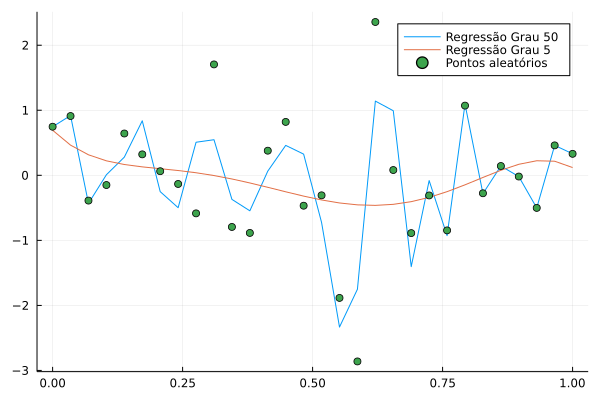

In [16]:
plot(x,Polynomial(o).(x), label="Regressão Grau 50", leg=true)
plot!(x,Polynomial(i).(x), label="Regressão Grau 5", leg=true)
scatter!(x,y, label="Pontos aleatórios")

Basicamente, o Julia consegue fazer a regressão com polinômios maiores que o 29 (número de pontos dados + 1). Provavelmente, dada uma maior quantidade de equações do que coefcientes, há uma liberdade para o estabelecimento de soluções, ou seja, não há uma saída única.

### Item 1.2.4 Gráfico Erro total x Grau

Implementamos a função de erro total, que será necessária para a criação do gráfico:

In [17]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)  
end

erro_total (generic function with 1 method)

In [18]:
function erro_versus_grau(x,y,grau)
    
    #Criação de um vetor vazio com o tamanho sendo igual ao total de coeficientes
    array_erros = Vector{Float64}(undef, grau+1) 
    
    #Loop para fazer a regressão, transformar ela em um polinômio, torná-lo modelo e alocar o valor do erro total em um array que armazena todos os erros
    for i=1:grau+1
        o=regressão(x,y,i-1)
        modelo=Polynomial(o)
        array_erros[i]=erro_total(x,y,modelo)
        print("Erro Grau ")
        print(i-1)
        print(" >>> ")
        print(array_erros[i])
        print("\n")
    end
    
    plot(array_erros,title="Erro Total x Grau")
end

erro_versus_grau (generic function with 1 method)

Erro Grau 0 >>> 5.344042448678303
Erro Grau 1 >>> 5.308892497756501
Erro Grau 2 >>> 5.1306017922091165
Erro Grau 3 >>> 5.1269776003580905
Erro Grau 4 >>> 5.124999360875871
Erro Grau 5 >>> 5.102524085966476
Erro Grau 6 >>> 5.04298797807723
Erro Grau 7 >>> 5.030068545496784
Erro Grau 8 >>> 5.029114743232748
Erro Grau 9 >>> 5.0154471634803475
Erro Grau 10 >>> 5.01464519085351
Erro Grau 11 >>> 4.980234949549037
Erro Grau 12 >>> 4.818850117883293
Erro Grau 13 >>> 4.78110173532417
Erro Grau 14 >>> 4.767766508054251
Erro Grau 15 >>> 4.527333335184696
Erro Grau 16 >>> 4.515078152895704
Erro Grau 17 >>> 3.939202856885767
Erro Grau 18 >>> 3.8418260207980865
Erro Grau 19 >>> 3.8633697939810037
Erro Grau 20 >>> 3.6185676596260543
Erro Grau 21 >>> 3.598733972111681
Erro Grau 22 >>> 3.5883399283759005
Erro Grau 23 >>> 3.5863681451069813
Erro Grau 24 >>> 3.586371434903802
Erro Grau 25 >>> 3.5858056276245107
Erro Grau 26 >>> 3.5850583587975415
Erro Grau 27 >>> 3.584277803254186
Erro Grau 28 >>> 3.5844

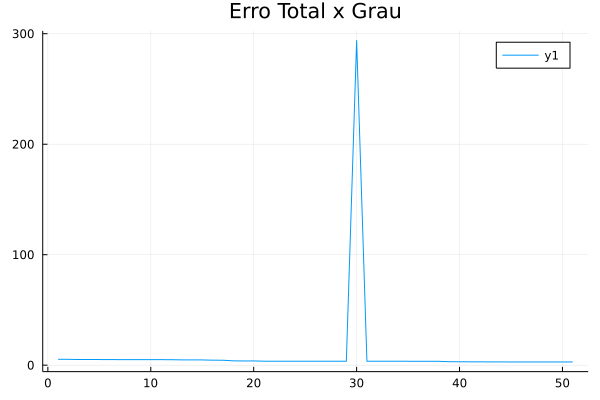

In [19]:
erro_versus_grau(x,y,50)

O erro segue diminuindo (com excessão do grau 30, por algum motivo). Isso de fato era esperado, já que:

>1. Conforme o grau aumenta, há mais viabilidade para a função tentar passar por todos os pontos fornecidos.  
2. A função possui bastante ruído, logo, atingir o grau 5 não irá zerar o erro.

No entanto, é importante ressaltar o enorme overfitting que isso causa: os dados são cada vez mais bem explicados, porém, a explicação do fenômeno fica mais nebulosa. 

## Questão 1.3

Primeiramente, vamos dar nome às variáveis de nosso sistema:

> Toy Story = TS  
Rocky = R  
De volta pro futuro = DF  
Curtindo a vida adoidado = C  
Os Incríveis = I  
Shrek = S  
Harry Potter = HP  
Duna = DU  
Batman Begins = B
  

Agora, estabelecemos as equações envolvendo essas variáveis:
> $$TS - R = 11$$  
$$DF - C = 3$$  
$$I - DU = 7$$  
$$B - HP = 2$$  
$$S - DU = 9$$  
$$HP - R = 7$$  
$$TS - DF = 5$$  
$$I - HP = 5$$  
$$C - DU = 2$$  
$$DF - DU = 2$$  
$$S - R = 11$$  
$$I - B = 5$$  
$$TS - B = 3$$  
$$I - C = 7$$  

Em sequência, montamos as matrizes e calculamos o resultado com o operador \ para a resolução do sistema linear ou uso de mínimos quadrados.

In [20]:
A = [ 
 1 -1  0  0  0  0  0  0  0;
 0  0  1 -1  0  0  0  0  0;
 0  0  0  0  1  0  0 -1  0;
 0  0  0  0  0  0 -1  0  1;
 0  0  0  0  0  1  0 -1  0;
 0 -1  0  0  0  0  1  0  0;
 1  0 -1  0  0  0  0  0  0;
 0  0  0  1  0  0  0 -1  0;
 0  0  1  0  0  0  0 -1  0;
 0 -1  0  0  0  1  0  0  0;
 0  0  0  0  1  0  0  0 -1;
 1  0  0  0  0  0  0  0 -1;
 0  0  0 -1  1  0  0  0  0;
 0  0  0  0  0  0  0  1  0]

B = [11;3;7;2;9;7;5;2;2;11;5;3;7;10]

x=A\B

9-element Vector{Float64}:
 17.466042154566747
  6.505854800936774
 12.800936768149887
 10.936768149882903
 18.00936768149883
 18.252927400468383
 12.798594847775176
 10.0
 14.091334894613588

Podemos ver então que o sexto coeficiente, isto é, Shrek, possui o maior valor. Portanto, trata-se do filme preferido entre os alunos participantes da pesquisa.

## Questão 1.4

Faremos o que foi realizado na 1.2.4: plotar um gráfico de erro total versus grau para saber exatamente em qual é melhor para trabalhar a estimativa. A primeira coisa a ser feita é escrever os 69 dados de x e y. Depois, chamamos a função erro_versus_grau.

Erro Grau 0 >>> 14.03945785319342
Erro Grau 1 >>> 5.049197780093411
Erro Grau 2 >>> 4.982549448045706
Erro Grau 3 >>> 4.981346276253119
Erro Grau 4 >>> 4.729552966968573
Erro Grau 5 >>> 4.47216357359535
Erro Grau 6 >>> 4.394814445596997
Erro Grau 7 >>> 4.127833079840566
Erro Grau 8 >>> 241.98218636540923
Erro Grau 9 >>> 282.7746412561459
Erro Grau 10 >>> 374.431883549115
Erro Grau 11 >>> 1237.5530772718112
Erro Grau 12 >>> 4496.004627507496
Erro Grau 13 >>> 3.669897130407607e6
Erro Grau 14 >>> 5.9368988515815e8
Erro Grau 15 >>> 1.8515556007842252e11
Erro Grau 16 >>> 3.7136997810412964e12
Erro Grau 17 >>> 1.2193642607731972e15
Erro Grau 18 >>> 8.35599727456279e16
Erro Grau 19 >>> 2.508285425731184e18
Erro Grau 20 >>> 1.9855895921863786e20
Erro Grau 21 >>> 6.620028426056897e22
Erro Grau 22 >>> 1.0270675793962071e25
Erro Grau 23 >>> 1.4970211031697872e26
Erro Grau 24 >>> 4.821397369608161e28
Erro Grau 25 >>> 9.181706533889443e29
Erro Grau 26 >>> 1.3541661094225373e31
Erro Grau 27 >>> 2.44

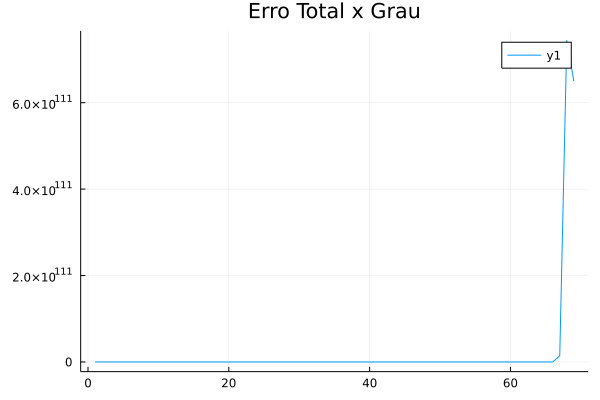

In [21]:
x=[0,1,2,3,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,48,50,52,53,54,55,56,57,58,59,60,61,62,63,64,70,71,72,73,74,76,77,78,79,80,81,82,83]
y=[120.6,121.6,120.8,121.4,121.1,121.1,120.4,120.3,120.8,120.6,119.6,119.8,118.7,120.5,120.1,120.2,120.7,121.7,120.7,120.7,120.3,119.4,119.1,120.2,120.7,120.1,119.7,119.2,119.4,119.5,119.0,118.9,118.7,118.3,118.5,118.6,118.8,118.5,118.3,117.8,118.0,119.0,118.4,116.9,117.5,117.4,117.6,118.1,117.3,117.6,117.7,117.6,117.3,118.0,117.8,117.5,119.0,117.6,116.8,116.6,116.9,116.1,116.1,115.8,115.6,116.0,115.4,115.5,115.3]
erro_versus_grau(x,y,68)

Vemos então que o nosso cotovelo é o grau 1 (maior decrescimento do erro). A partir de agora, vamos trabalhar em cima dele para localizar o momento em que o peso é 110 kg.

In [22]:
k=Polynomial(regressão(x,y,1))

Polynomial(121.4508816602137 - 0.06647150089703203*x)

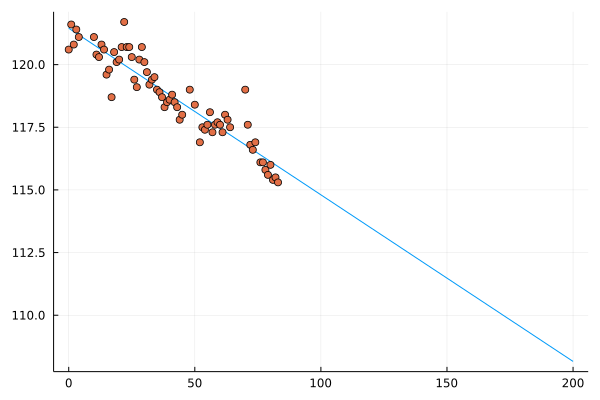

In [23]:
plot(k,0,200,leg=false)
scatter!(x,y)

É possível observar que o valor atinge 110 KG um pouco depois do 150º dia desde o começo da pesagem. Vamos localizar exatamente qual o dia por meio da resolução da equação.

>$$110 = 121.4508816602137 - 0.06647150089703203*x$$  
$$0.06647150089703203*x  = 11.4508816602137$$  
$$x = 172.267535796307$$

Dessa forma, a estimativa encontrada é a que o professor terá 110kg no 173º dia. Isso quer dizer então: 17/04/2022.

## Questão 1.5

Consideraremos os dados partindo do início da investigação (a entrada estará em minutos):

> $$x(0) = 34$$  
$$x(90) = 30$$  
$$x(150) = 25$$

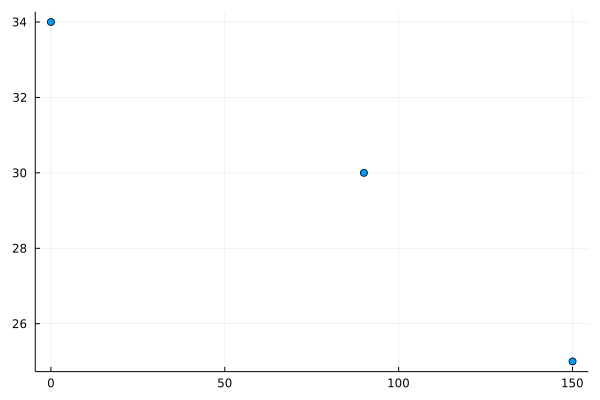

In [24]:
x=[0,90,150]
y=[34,30,25]
scatter(x,y,leg=false)

Agora, precisamos "transportar o mundo real para o mundo barra":

Mundo real: $$T(x) = 14*E^{-kx}+20$$

Indo para o mundo barra:  
$$y = 14*e^{c*x}+20$$  
$$y-20 = 14*e^{cx}$$  
$$\frac{(y-20)}{14} = e^{cx}$$  
$$ln(\frac{(y-20)}{14}) = ln(e^{c*x})$$   
$$ln(\frac{(y-20)}{14}) = c*x$$ 

Agora, definimos os x_barra e y_barra baseado no que encontramos:

In [25]:
y_barra = log.((y.-20)./14)
x_barra = x

3-element Vector{Int64}:
   0
  90
 150

Agora, faremos o passo a passo de uma regressão sem a chamada da função implementada, já que é preciso modificar a matriz de Vandermonde. O motivo disso é porque precisamos linearizar, o que significa que geraremos dois coeficientes. Acontece que o c1 não deve ser utilizado por não estar presente na equação mostrada anteriormente. Se utilizássemos o Vandermonde normalmente, ele assumiria que c1 pode ter qualquer valor, apesar de não ser esse o caso. Portanto, iremos modificá-lo, colocando 0 na primeira coluna.

In [26]:
V=vandermonde(x_barra,y_barra,1)
V[:,1].=0
c_barra=V\y_barra

2-element Vector{Float64}:
  0.0
 -0.0060367782311465

Encontramos então os dois coeficientes. Por fim, agora podemos resolver a equação igualando a 37 e encontra o tempo do assassinato. 

Abaixo, uma plot com intuito apenas de mostrar o resultado.

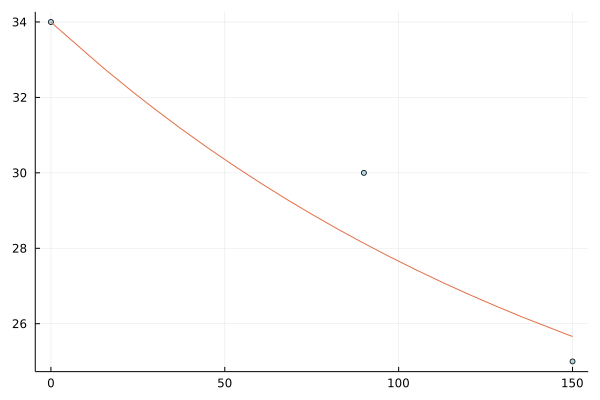

In [27]:
c2=c_barra[2]
exponencial(x)=14*exp(c2*x)+20
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(exponencial)

Agora, resolvemos a equação:

> $$37 = 14*e^{0.0060367782311465*x}+20$$  
$$x = -32.16219099108466$$

In [28]:
# Determinando os segundos
0.16219099108466*60

9.7314594650796

Concluímos então que o horário do assassinato foi 14h23m50s.